Imports:

In [192]:
import pandas as pd
import numpy as np
import pylab as plt

Read the data:

In [193]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


data types of each column:

In [195]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [196]:
#Type 'object' is a string for pandas, which poses problems with machine learning algorithms. 
#If we want to use these as features, we'll need to convert these to number representations.

basic information on the DataFrame:

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
#Age, Cabin, and Embarked are missing values.

statistics on the DataFrame:

In [199]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


exploratory data analysis and cleaning data:

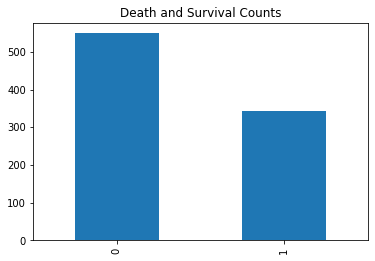

In [200]:
df_train['Survived'].value_counts().plot(kind='bar',title='Death and Survival Counts')

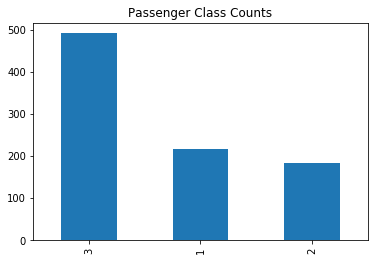

In [201]:
df_train['Pclass'].value_counts().plot(kind='bar',title='Passenger Class Counts')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

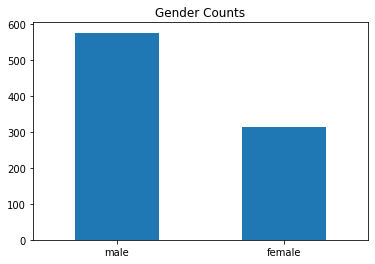

In [202]:
df_train['Sex'].value_counts().plot(kind='bar',title='Gender Counts')
plt.xticks(rotation=0)

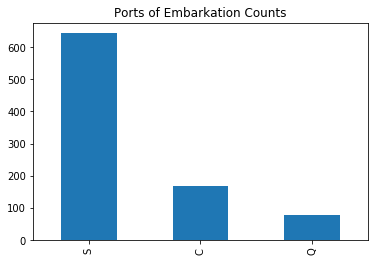

In [203]:
df_train['Embarked'].value_counts().plot(kind='bar',title='Ports of Embarkation Counts')

Text(0.5, 1.0, 'Age Histogram')

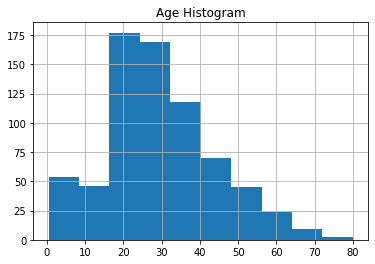

In [204]:
df_train['Age'].hist()
plt.title('Age Histogram')

determine which proportion of passengers survived based on their passenger class.

cross tab of Pclass and Survived:

In [205]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

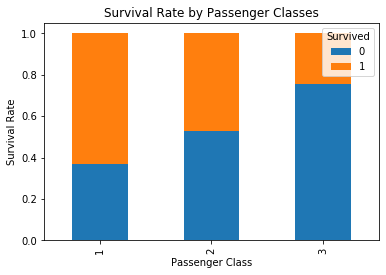

In [206]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [207]:
#Transform Sex from a string to a number representation:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [208]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [209]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt

Survived,0,1
Sex_Val,,
0,81,233
1,468,109


Text(0, 0.5, 'Survival Rate')

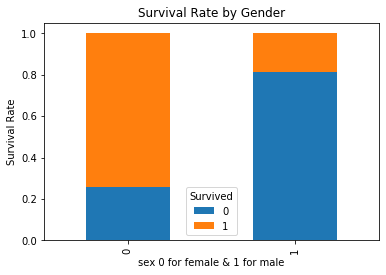

In [210]:
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.xlabel('sex 0 for female & 1 for male')
plt.ylabel('Survival Rate')

In [211]:
#the sex wise unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print ('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Text(0, 0.5, 'Survival Rate')

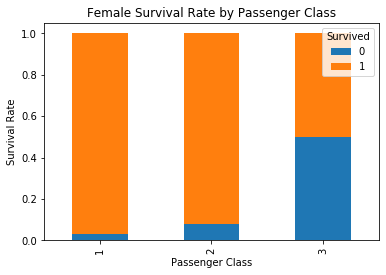

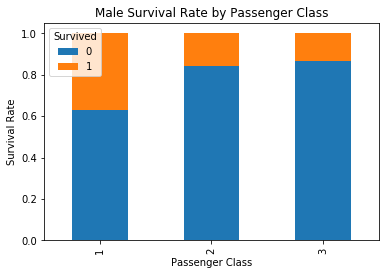

In [212]:
# Plot female survival rate class wise
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot male survival rate class wise
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [213]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


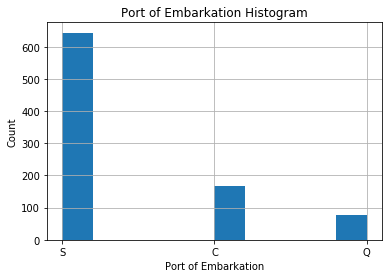

In [214]:
df_train['Embarked'].hist()
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [215]:
#replace nan values with the majority.

In [216]:
df_train.Embarked.replace(np.nan,'S',inplace = True)

In [217]:
# check for nan value present.

In [218]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val


In [219]:
embarked_xt = pd.crosstab(df_train['Embarked'], df_train['Survived'])
embarked_xt

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


Text(0, 0.5, 'Survival Rate')

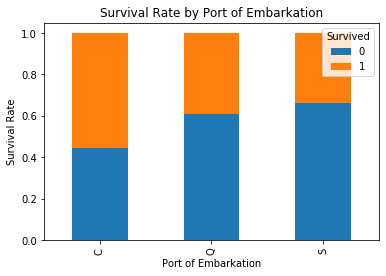

In [220]:
embarked_xt_pct = \
    embarked_xt.div(embarked_xt.sum(1).astype(float), axis=0)
embarked_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [221]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [222]:
#the Age typical for each passenger class by Sex_Val. 
#We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [223]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [224]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_Val      891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [225]:
df_train['AgeFill'] = df_train['Age']
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,26.0


In [226]:
# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [227]:
len(df_train[df_train['AgeFill'].isnull()])

0

Text(0, 0.5, 'Count')

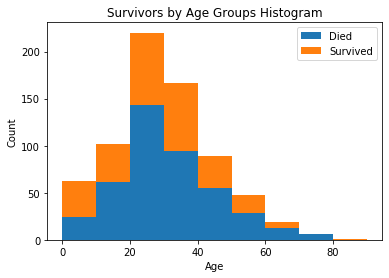

In [228]:
# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
plt.hist([df1, df2], 
             bins=range(0, 100, 10), 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

In [229]:
survivors = pd.crosstab(df_train['Survived'], df_train['Pclass'])
survivors

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0.5, 1.0, 'Comparison of survivors v/s non survivors based on ticket class')

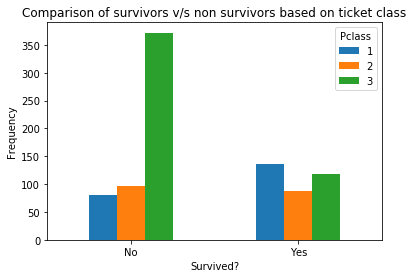

In [230]:

survivors = pd.crosstab(df_train['Survived'], df_train['Pclass'])
survivors.plot(kind='bar')
plt.xlabel('Survived?')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Frequency')
plt.title('Comparison of survivors v/s non survivors based on ticket class')

AgeFill density by Pclass:

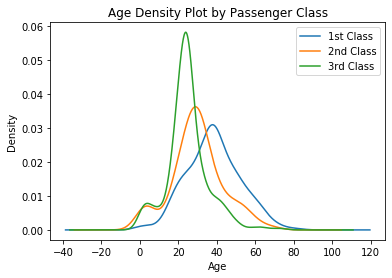

In [231]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [232]:
#When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

Text(0.5, 1.0, 'Plot the AgeFill histogram for Survivors')

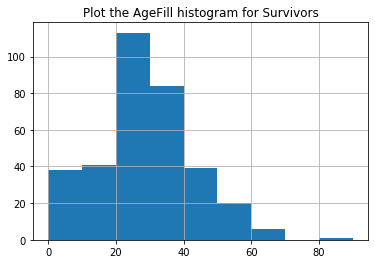

In [233]:
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=range(0, 100, 10), range=(1, max_age))
plt.title('Plot the AgeFill histogram for Survivors')

Text(0.5, 1.0, 'Plot the AgeFill histogram of Females')

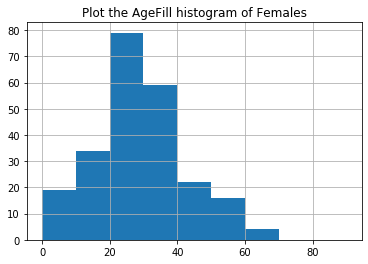

In [234]:
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=range(0, 100, 10), range=(1, max_age))
plt.title('Plot the AgeFill histogram of Females')

Text(0.5, 1.0, 'Plot the AgeFill histogram of first class passengers')

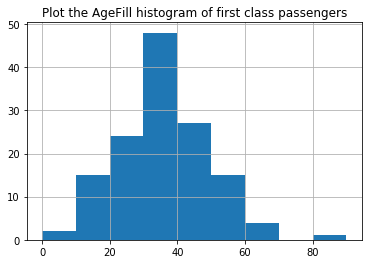

In [235]:
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=range(0, 100, 10), range=(1, max_age))
plt.title('Plot the AgeFill histogram of first class passengers')

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [236]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0


Text(0.5, 1.0, 'Family Size Histogram')

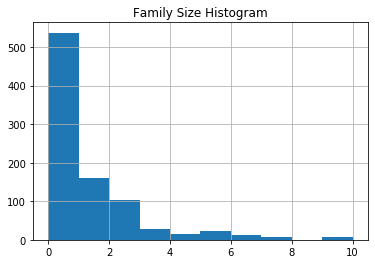

In [237]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Text(0.5, 1.0, 'Survivors by Family Size')

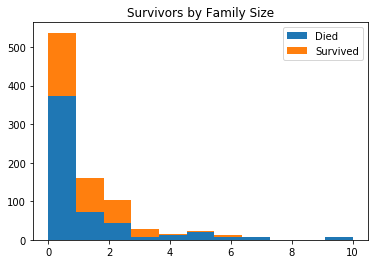

In [238]:
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Final Data Preparation for Machine Learning:

In [239]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,21.5,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,26.0,0


In [240]:
df_train.Embarked[df_train.Embarked == 'C'] = 1
df_train.Embarked[df_train.Embarked == 'Q'] = 2
df_train.Embarked[df_train.Embarked == 'S'] = 3
df_train 

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3,1,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,3,1,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,3,0,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,3,0,21.5,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,1,26.0,0


In [241]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [242]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin'], 
                         axis=1)

In [243]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId'], axis=1)
df_train.dtypes

Survived        int64
Pclass          int64
Fare          float64
Embarked       object
Sex_Val         int32
AgeFill       float64
FamilySize      int64
dtype: object

In [244]:
df_train

,Survived,Pclass,Fare,Embarked,Sex_Val,AgeFill,FamilySize
0,0,3,7.2500,3,1,22.0,1
1,1,1,71.2833,1,0,38.0,1
2,1,3,7.9250,3,0,26.0,0
3,1,1,53.1000,3,0,35.0,1
4,0,3,8.0500,3,1,35.0,0
...,...,...,...,...,...,...,...
886,0,2,13.0000,3,1,27.0,0
887,1,1,30.0000,3,0,19.0,0
888,0,3,23.4500,3,0,21.5,3
889,1,1,30.0000,1,1,26.0,0


In [245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Fare        891 non-null    float64
 3   Embarked    891 non-null    object 
 4   Sex_Val     891 non-null    int32  
 5   AgeFill     891 non-null    float64
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB


In [246]:
#convert object to numeric

In [247]:
df_train["Embarked"] = pd.to_numeric(df_train["Embarked"])

In [248]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Fare        891 non-null    float64
 3   Embarked    891 non-null    int64  
 4   Sex_Val     891 non-null    int32  
 5   AgeFill     891 non-null    float64
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [249]:
df_train

,Survived,Pclass,Fare,Embarked,Sex_Val,AgeFill,FamilySize
0,0,3,7.2500,3,1,22.0,1
1,1,1,71.2833,1,0,38.0,1
2,1,3,7.9250,3,0,26.0,0
3,1,1,53.1000,3,0,35.0,1
4,0,3,8.0500,3,1,35.0,0
...,...,...,...,...,...,...,...
886,0,2,13.0000,3,1,27.0,0
887,1,1,30.0000,3,0,19.0,0
888,0,3,23.4500,3,0,21.5,3
889,1,1,30.0000,1,1,26.0,0


Convert the DataFrame to a numpy array:

In [250]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  1.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    , 32.    ,  0.    ]])

Data Wrangling done:)

Random Forest: 

Training:

In [251]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [252]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

In [253]:
# 'Survived' column values
train_target = train_data[:, 0]

In [254]:
# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

Predicting:

loading and making ready to use the test dataset for predicting:

In [255]:
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [256]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [257]:
df_test = df_test.drop(['Name',  'Ticket', 'Cabin', ], axis=1)

In [258]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [259]:
df_test.Sex[df_test.Sex == 'male'] = 1
df_test.Sex[df_test.Sex == 'female'] = 0
df_test

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,S
414,1306,1,0,39.0,0,0,108.9000,C
415,1307,3,1,38.5,0,0,7.2500,S
416,1308,3,1,NaN,0,0,8.0500,S


In [260]:
df_test.Embarked[df_test.Embarked == 'C'] = 1
df_test.Embarked[df_test.Embarked == 'Q'] = 2
df_test.Embarked[df_test.Embarked == 'S'] = 3
df_test 

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avo

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,3
414,1306,1,0,39.0,0,0,108.9000,1
415,1307,3,1,38.5,0,0,7.2500,3
416,1308,3,1,NaN,0,0,8.0500,3


In [261]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [262]:
df_test["Embarked"] = pd.to_numeric(df_test["Embarked"])

In [263]:
df_test["Sex"] = pd.to_numeric(df_test["Sex"])

In [264]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [265]:
df_test['Age'] = df_test['Age'] \
                        .groupby([df_test['Sex'], df_test['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [266]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [267]:
df_test = df_test.dropna()

In [268]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Fare        891 non-null    float64
 3   Embarked    891 non-null    int64  
 4   Sex_Val     891 non-null    int32  
 5   AgeFill     891 non-null    float64
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [269]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


In [270]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [271]:
df_test = df_test.drop(['SibSp',  'Parch' ], axis=1)

In [272]:
df_test['AgeFill'] = df_test['Age']
df_test['Sex_Val'] = df_test['Sex']

In [273]:
df_test = df_test.drop(['Age',  'Sex' ], axis=1)

In [274]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Fare         417 non-null    float64
 3   Embarked     417 non-null    int64  
 4   FamilySize   417 non-null    int64  
 5   AgeFill      417 non-null    float64
 6   Sex_Val      417 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


test data ready:)

In [275]:
test_data = df_test.values

In [276]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]

In [277]:
# Predict the Survival values for the test data
test_y = clf.predict(test_x)

In [278]:
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']] \
    .to_csv('results-rf.csv', index=False)

Evaluate Model Accuracy:

In [279]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 6) (891,)
(712, 6) (712,)
(179, 6) (179,)


Use the new training data to fit the model, predict, and get the accuracy score:

In [280]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.85


In [281]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.85 

Confusion Matrix  [[100  10]
 [ 17  52]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 100 |  10 |
Actual   |-----|-----|
       1 |  17 |  52 |
         |-----|-----|


In [282]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.91      0.88       110
    Survived       0.84      0.75      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



Done:)

In [283]:
import pickle

In [284]:
titanicpickl='titanicclf.pkl'

In [285]:
pickle.dump(clf,open(titanicpickl,'wb'))